Импортируем датасет

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Импортируем библеотечки

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Обработка обучающих фоток

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
 '/content/drive/MyDrive/Ttainig/train',
labels = 'inferred',
label_mode = 'categorical',
class_names = None,
color_mode = 'rgb',
batch_size = 32,
image_size = (64,64),
shuffle = True,
seed = None,
validation_split = None,
subset = None,
interpolation = 'bilinear',
follow_links = False,
crop_to_aspect_ratio = False
)

Found 3119 files belonging to 36 classes.


проверка обработки изображений

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
 '/content/drive/MyDrive/Ttainig/validation',
labels = 'inferred',
label_mode = 'categorical',
class_names = None,
color_mode = 'rgb',
batch_size = 32,
image_size = (64,64),
shuffle = True,
seed = None,
validation_split = None,
subset = None,
interpolation = 'bilinear',
follow_links = False,
crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


Построение модели

In [ ]:
cnn = tf.keras.models.Sequential()

Создание слоя свертки

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) # это надо чтобы избежать переобучения

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) #создание выходного слоя

Этап обучения

In [ ]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 130s 1s/step - loss: 3.6918 - accuracy: 0.1209 - val_loss: 4.3626 - val_accuracy: 0.1168
Epoch 2/32
98/98 [==============================] - 113s 1s/step - loss: 3.5613 - accuracy: 0.1751 - val_loss: 2.5547 - val_accuracy: 0.3447
Epoch 3/32
98/98 [==============================] - 124s 1s/step - loss: 3.4355 - accuracy: 0.2308 - val_loss: 2.6830 - val_accuracy: 0.3761
Epoch 4/32
98/98 [==============================] - 114s 1s/step - loss: 4.1742 - accuracy: 0.2847 - val_loss: 2.3083 - val_accuracy: 0.4786
Epoch 5/32
98/98 [==============================] - 122s 1s/step - loss: 2.8337 - accuracy: 0.3463 - val_loss: 1.7970 - val_accuracy: 0.5926
Epoch 6/32
98/98 [==============================] - 131s 1s/step - loss: 2.7040 - accuracy: 0.3940 - val_loss: 1.9277 - val_accuracy: 0.5983
Epoch 7/32
98/98 [==============================] - 116s 1s/step - loss: 2.2765 - accuracy: 0.4643 - val_loss: 1.8929 - val_accuracy: 0.6610
Epoch 8/32
98

In [47]:
cnn.save('trained_model.h5')

In [40]:
training_history.history

{'loss': [3.6917989253997803,
  3.5613245964050293,
  3.435492992401123,
  4.1742143630981445,
  2.8336617946624756,
  2.704042434692383,
  2.2765254974365234,
  3.0840210914611816,
  2.257972478866577,
  1.9781088829040527,
  2.080338716506958,
  1.6204227209091187,
  1.764059066772461,
  1.9621270895004272,
  1.7477301359176636,
  1.3847260475158691,
  1.2645241022109985,
  1.3840869665145874,
  1.1280255317687988,
  0.9929023385047913,
  1.0525583028793335,
  1.0176466703414917,
  1.0440471172332764,
  1.0116044282913208,
  0.890450656414032,
  1.097949743270874,
  0.9569011330604553,
  1.0919229984283447,
  1.0546855926513672,
  0.8071334958076477,
  0.8433223962783813,
  0.9491815567016602],
 'accuracy': [0.12087207287549973,
  0.1750561147928238,
  0.2308432161808014,
  0.28470662236213684,
  0.3462648391723633,
  0.39403656125068665,
  0.4642513692378998,
  0.4773966073989868,
  0.5325424671173096,
  0.5706957578659058,
  0.6005129814147949,
  0.6239179372787476,
  0.64604038000

In [41]:
import json
with open('train_his','w') as f:
  json.dump(training_history.history,f)

In [42]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Рассчет тоночти модели при проверке

In [43]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 91.45299196243286 %


Визуализация точности

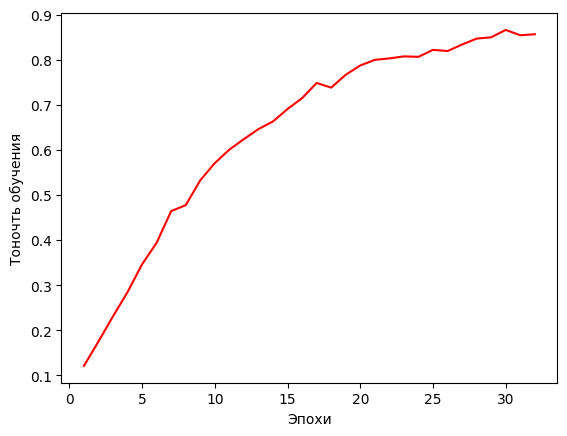

In [45]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'], color='red')
plt.xlabel('Эпохи')
plt.ylabel('Тоночть обучения')
plt.show()

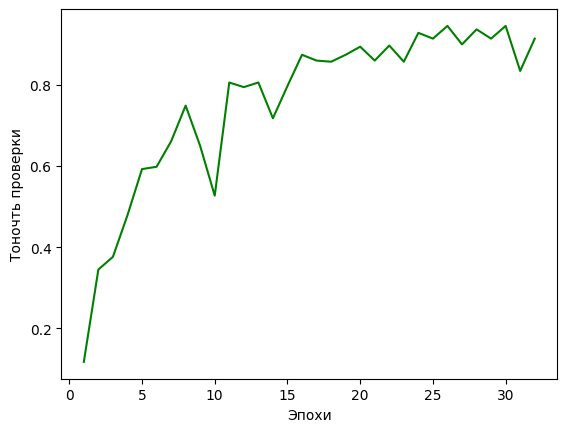

In [46]:
plt.plot(epochs,training_history.history['val_accuracy'], color='green')
plt.xlabel('Эпохи')
plt.ylabel('Тоночть проверки')
plt.show()